In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new dataset as per the user's instructions for step-by-step plotting
new_clean_data_path = 'clean_data.csv'
# Reload the dataset using the first column as the index
new_clean_data = pd.read_csv(new_clean_data_path, index_col=0)


new_clean_data.fillna('None', inplace=True)

# Display the first few rows of the dataframe to confirm the index is set correctly
new_clean_data




,model,prior,duplicates_level,distortion_level,num_iter,precision_mean,recall_mean,f1score_mean,precision_std,recall_std,f1score_std
0,Both,Bounded NBD,High,High,10000,0.998371,0.751479,0.857191,0.001466,0.029411,0.019271
1,Both,Bounded NBD,High,High,50000,0.999559,0.708233,0.828795,0.000905,0.025848,0.017251
2,Both,Bounded NBD,High,Low,10000,0.999872,0.935863,0.966809,0.000570,0.001298,0.000694
3,Both,Bounded NBD,High,Low,50000,1.000000,0.940335,0.969249,0.000000,0.002042,0.001085
4,Both,Bounded NBD,Low,High,10000,1.000000,0.750833,0.857600,0.000000,0.015742,0.010213
...,...,...,...,...,...,...,...,...,...,...,...
187,None,uniform,Medium,Low,50000,0.999770,0.925040,0.960950,0.000690,0.004306,0.002442
188,None,uniform,Very High,High,10000,0.999838,0.827264,0.905395,0.000566,0.004131,0.002543
189,None,uniform,Very High,High,50000,1.000000,0.835469,0.910358,0.000000,0.002674,0.001586
190,None,uniform,Very High,Low,10000,1.000000,0.922124,0.959484,0.000000,0.000917,0.000496


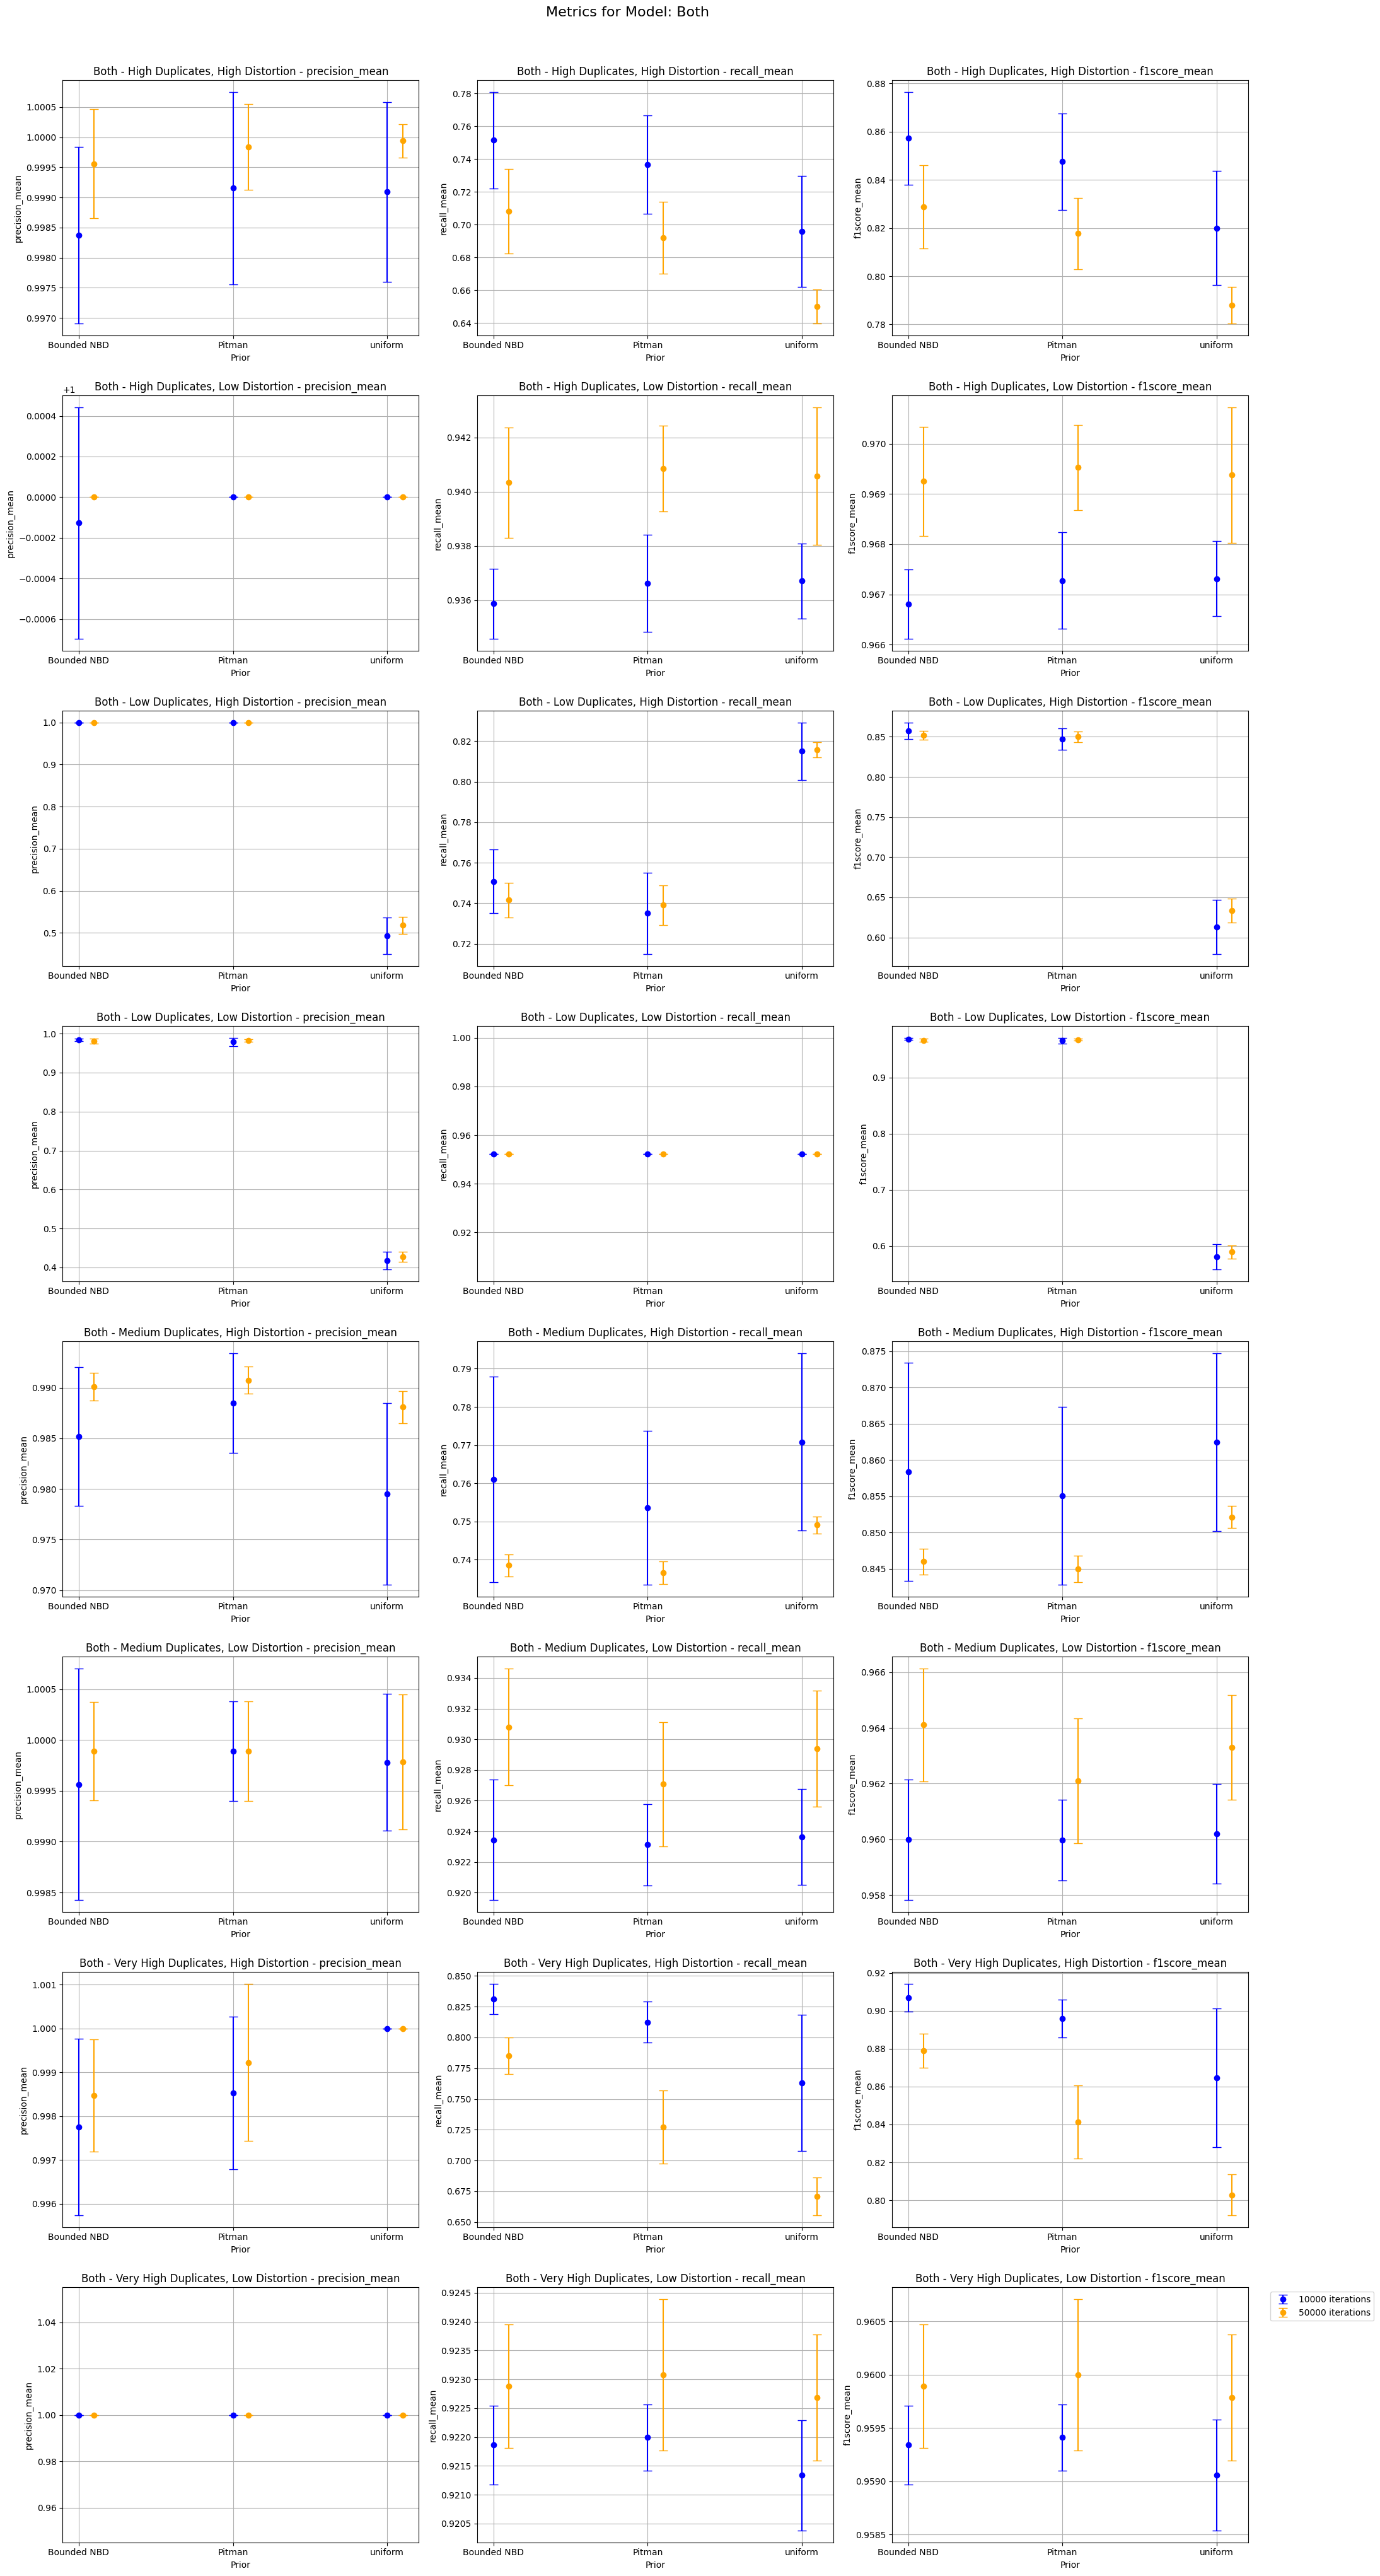

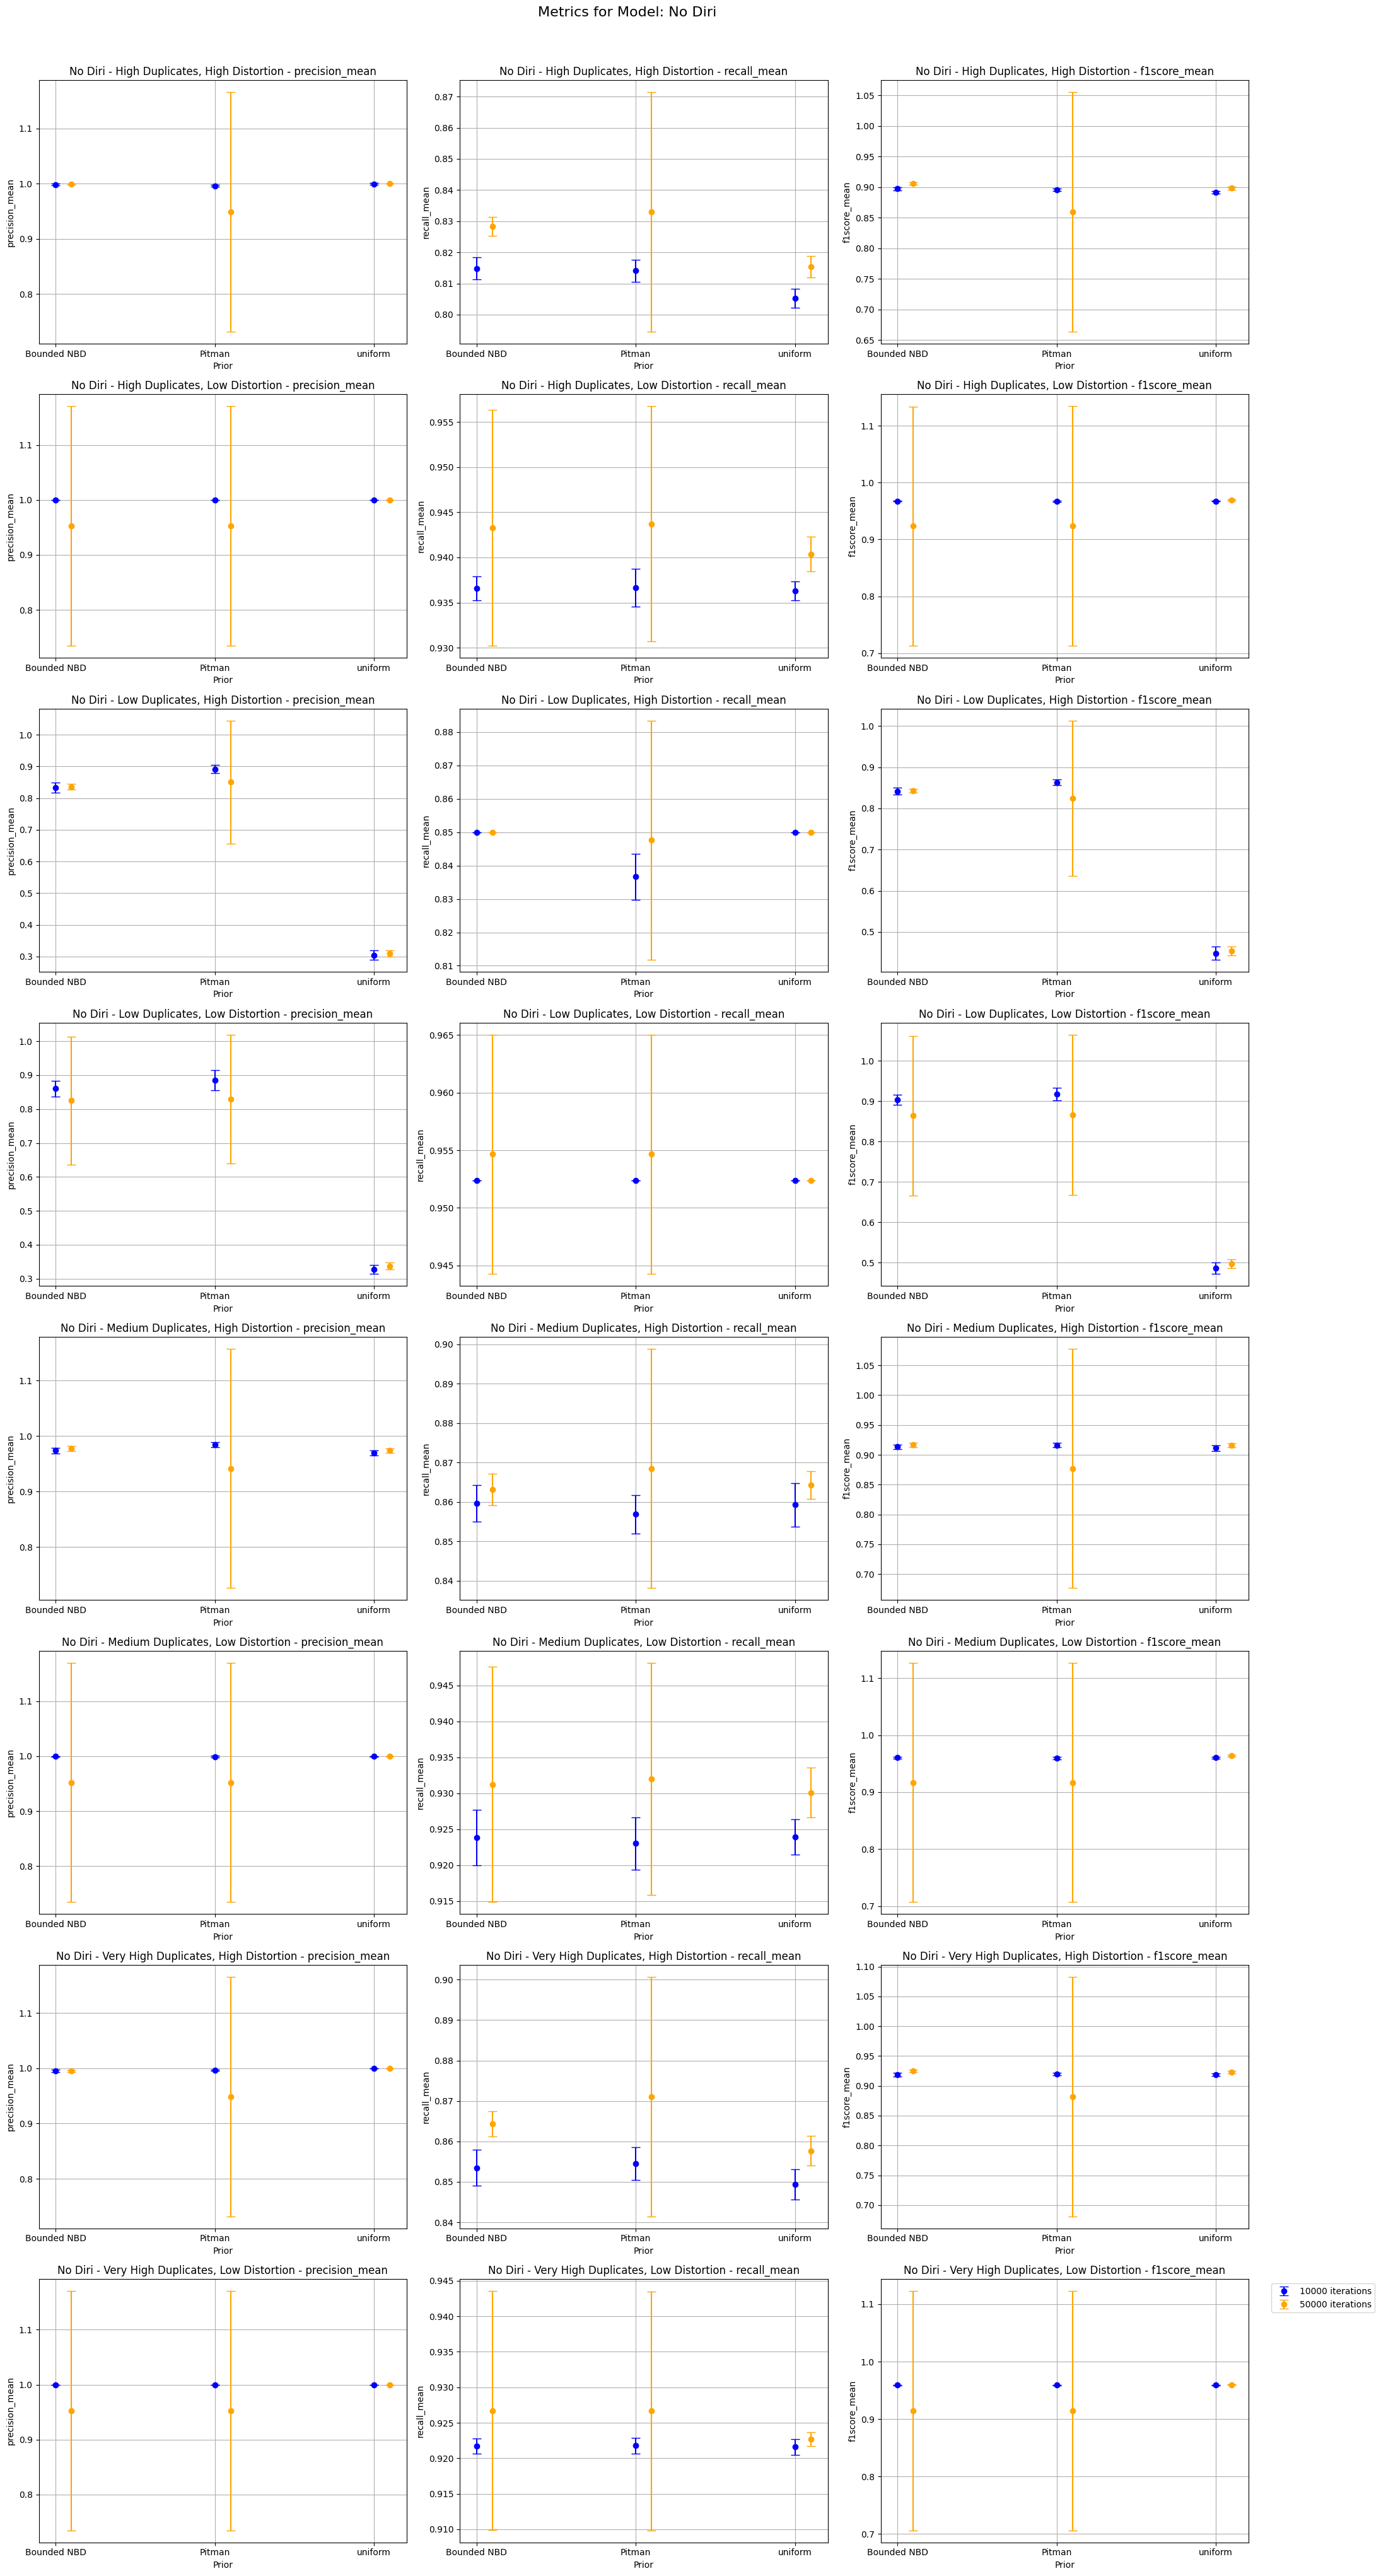

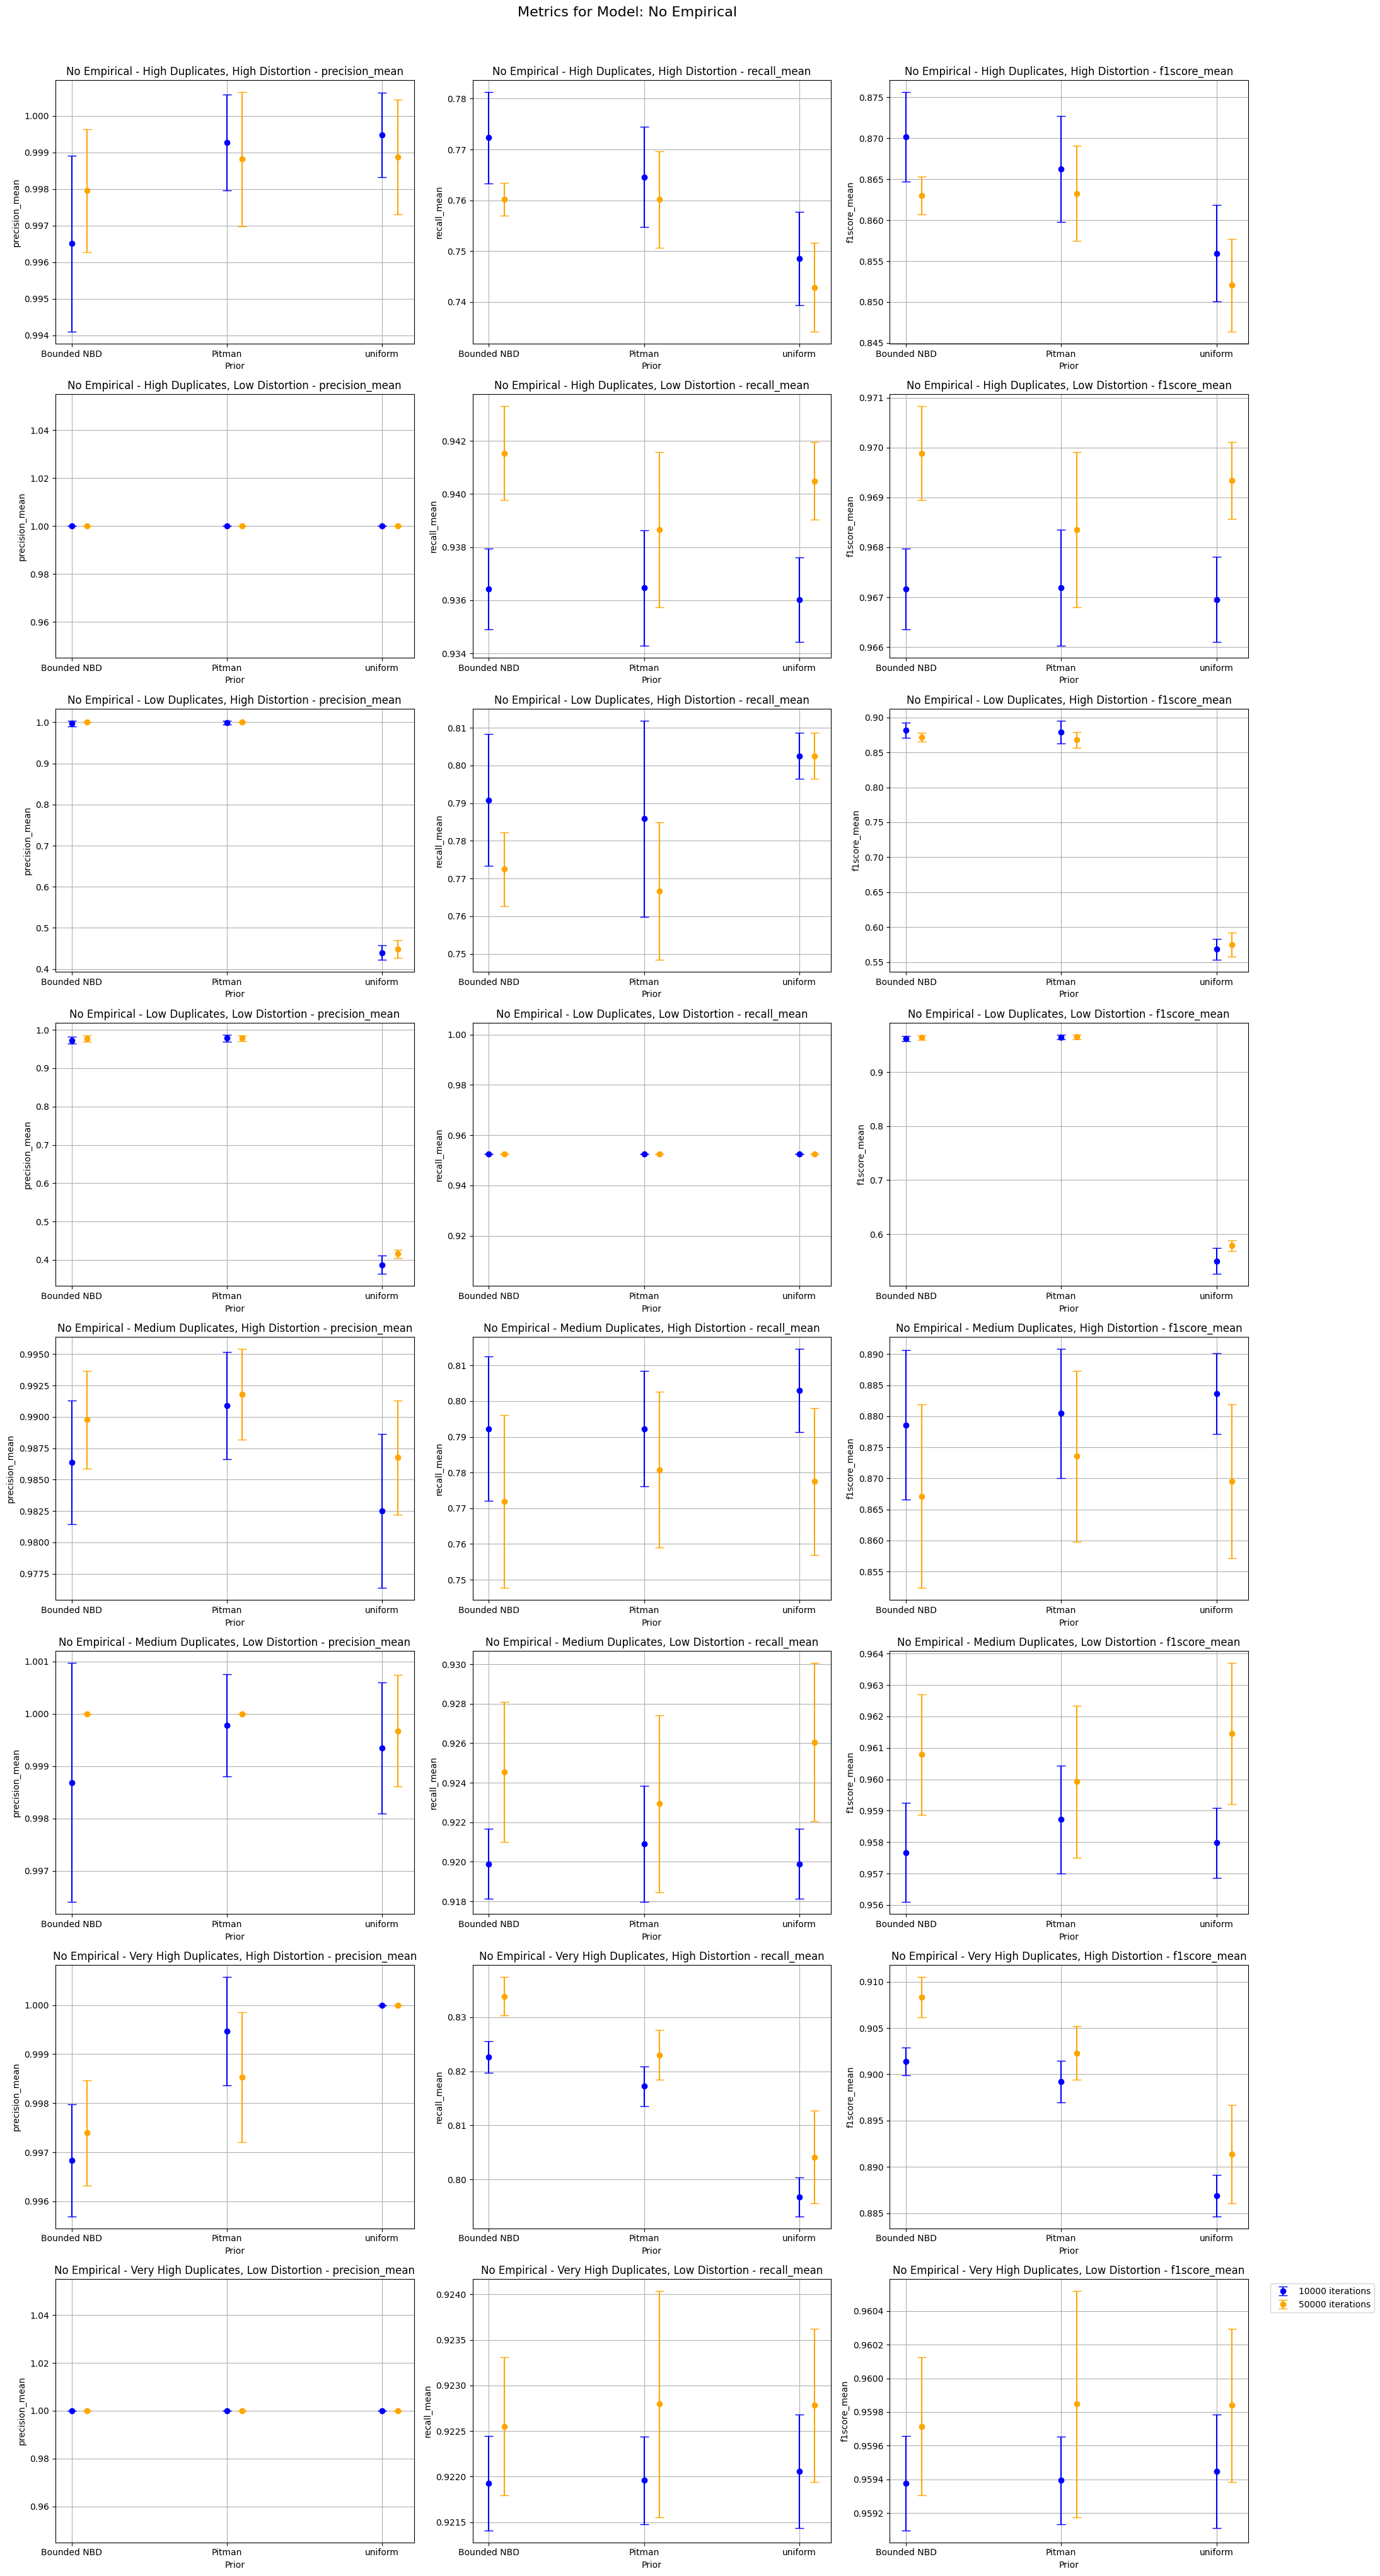

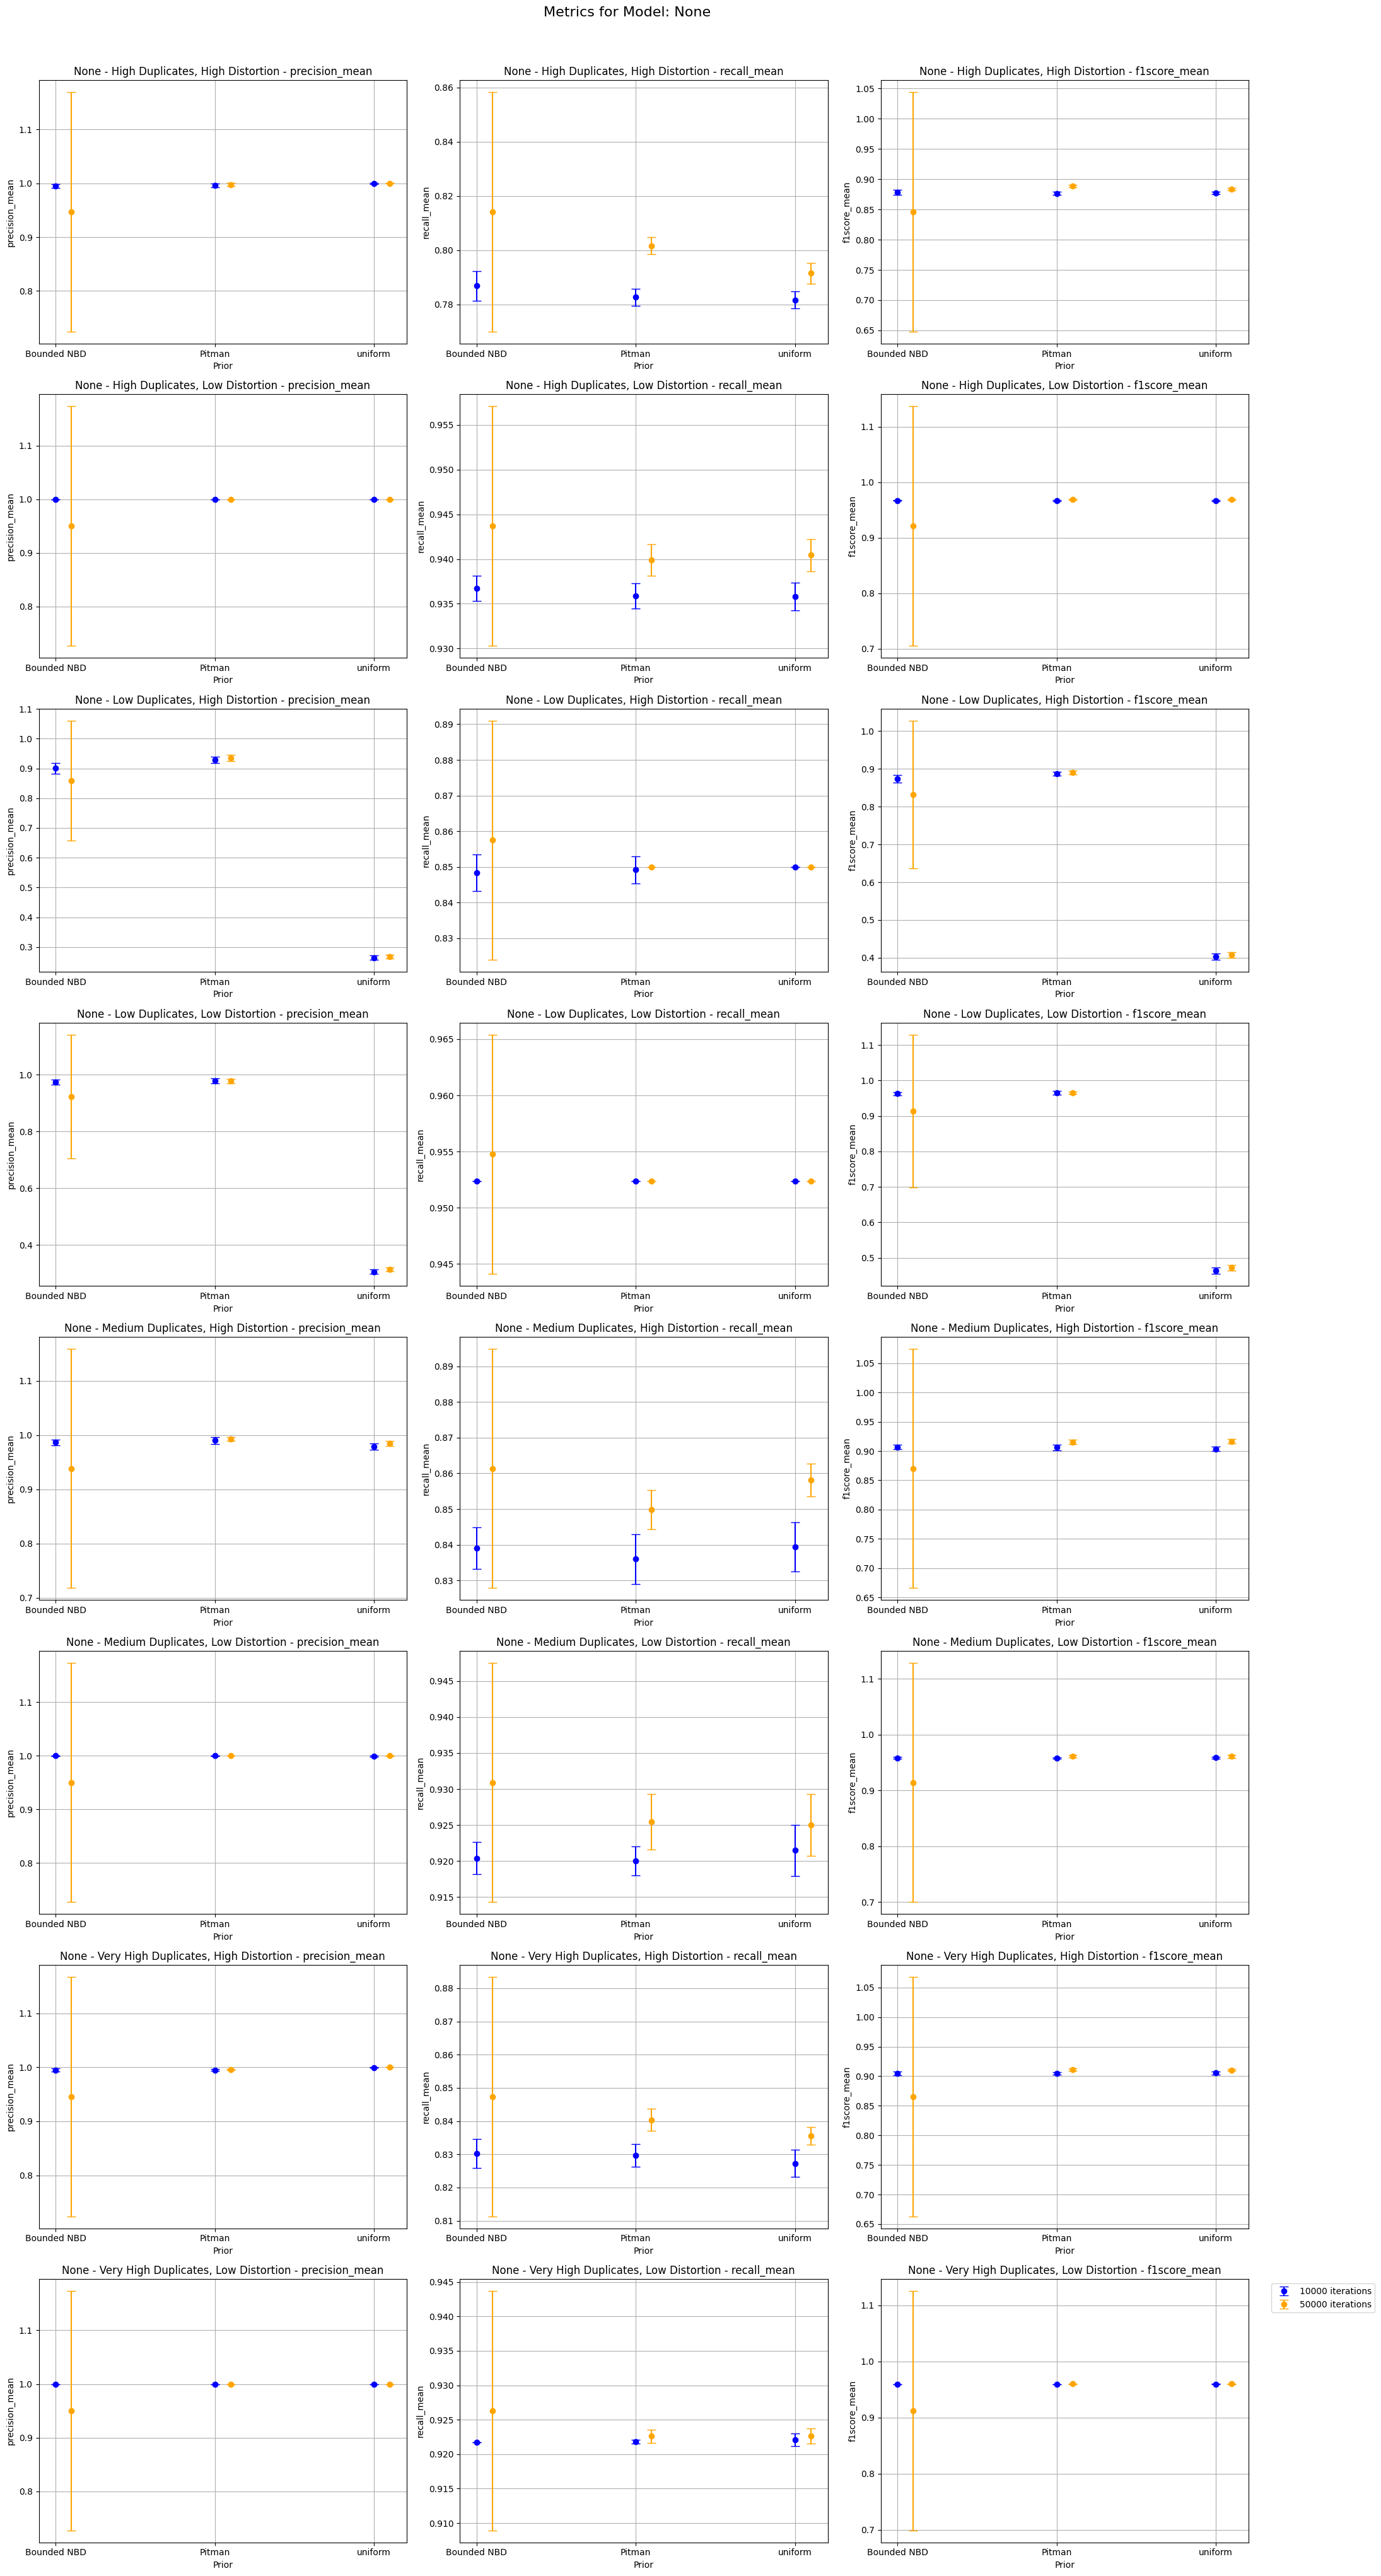

In [3]:
# Load the dataset anew for plotting other models, as we've encountered a reset previously


# Starting with "No Diri" model

df = new_clean_data

for model_to_plot in new_clean_data["model"].unique():
    df_model = df[df['model'] == model_to_plot]

    metrics = ['precision_mean', 'recall_mean', 'f1score_mean']

    filtered_data = new_clean_data[new_clean_data['model'] == 'Both']

    duplicates_levels = filtered_data['duplicates_level'].unique()
    distortion_levels = filtered_data['distortion_level'].unique()

    colors = {10000: 'blue', 50000: 'orange'}

    # Generate plots for "No Diri"
    plt.figure(figsize=(20, 40))

    for i, metric in enumerate(metrics):
        std_metric = metric.replace('mean', 'std')
        
        for j, dup_level in enumerate(duplicates_levels):
            for k, dist_level in enumerate(distortion_levels):
                index = (j * 2 + k) * 3 + i + 1
                plt.subplot(8, 3, index)
                
                df_plot = df_model[(df_model['duplicates_level'] == dup_level) & 
                                (df_model['distortion_level'] == dist_level)]
                
                for num_iter in [10000, 50000]:
                    subset = df_plot[df_plot['num_iter'] == num_iter]
                    x_values = [i + (0.1 if num_iter == 50000 else 0) for i in range(len(subset['prior'].unique()))]
                    plt.errorbar(x_values, subset[metric], yerr=subset[std_metric], fmt='o', capsize=5, color=colors[num_iter], label=f'{num_iter} iterations')
                    
                plt.xticks(ticks=range(len(subset['prior'].unique())), labels=subset['prior'].unique())
                plt.title(f'{model_to_plot} - {dup_level} Duplicates, {dist_level} Distortion - {metric}')
                plt.xlabel('Prior')
                plt.ylabel(metric)
                plt.grid(True)

    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.suptitle(f"Metrics for Model: {model_to_plot}", fontsize=16, y=1.02)

    # Save the plot for "No Diri"
    no_diri_plot_path = f"plots/{model_to_plot}_plot.png"
    plt.savefig(no_diri_plot_path, bbox_inches='tight')
    # no_diri_plot_path
